In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [18]:
df = pd.read_csv('vgsales.csv')

# Для начала изучим таблицу

In [19]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Для удобства названия колонок переведем в нижний регистр

In [21]:
df.columns = df.columns.str.lower()

In [22]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Так как пропусков не слишком много можно просто их удалить

In [23]:
df = df.dropna()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16291 non-null  int64  
 1   name          16291 non-null  object 
 2   platform      16291 non-null  object 
 3   year          16291 non-null  float64
 4   genre         16291 non-null  object 
 5   publisher     16291 non-null  object 
 6   na_sales      16291 non-null  float64
 7   eu_sales      16291 non-null  float64
 8   jp_sales      16291 non-null  float64
 9   other_sales   16291 non-null  float64
 10  global_sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Расчитаем максимальные продажи в каждом году и какому жанру они принадлежат

In [25]:
df_genre_most_sales = df[['genre', 'year', 'global_sales']]\
.groupby(['year','genre'], as_index = False).sum().sort_values(['year', 'global_sales'], ascending =[True, False])

### Выведем максимальное значение для продаж в отдельную колонку и вытащим нужные жанры

In [26]:
df_genre_most_sales['max_sales_per_year'] = df_genre_most_sales.groupby('year').transform('max')['global_sales']
df_genre_most_sales = df_genre_most_sales[df_genre_most_sales['global_sales'] == df_genre_most_sales['max_sales_per_year']]
df_genre_most_sales

,year,genre,global_sales,max_sales_per_year
3,1980.0,Shooter,7.07,7.07
5,1981.0,Action,14.84,14.84
15,1982.0,Puzzle,10.03,10.03
22,1983.0,Platform,6.93,6.93
31,1984.0,Shooter,31.10,31.10
35,1985.0,Platform,43.17,43.17
40,1986.0,Action,13.74,13.74
48,1987.0,Fighting,5.42,5.42
54,1988.0,Platform,27.73,27.73
64,1989.0,Puzzle,37.75,37.75


### Построим диаграму

In [27]:
df_genre_most_sales['genre'].value_counts()
#Похоже самый популярный игровой жанр в мире- экшн

genre
Action          17
Platform         8
Role-Playing     3
Sports           3
Shooter          2
Puzzle           2
Fighting         2
Racing           1
Simulation       1
Name: count, dtype: int64

C:\Users\cours\AppData\Local\Temp\ipykernel_26756\779074248.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '1980.0'),
 Text(1, 0, '1981.0'),
 Text(2, 0, '1982.0'),
 Text(3, 0, '1983.0'),
 Text(4, 0, '1984.0'),
 Text(5, 0, '1985.0'),
 Text(6, 0, '1986.0'),
 Text(7, 0, '1987.0'),
 Text(8, 0, '1988.0'),
 Text(9, 0, '1989.0'),
 Text(10, 0, '1990.0'),
 Text(11, 0, '1991.0'),
 Text(12, 0, '1992.0'),
 Text(13, 0, '1993.0'),
 Text(14, 0, '1994.0'),
 Text(15, 0, '1995.0'),
 Text(16, 0, '1996.0'),
 Text(17, 0, '1997.0'),
 Text(18, 0, '1998.0'),
 Text(19, 0, '1999.0'),
 Text(20, 0, '2000.0'),
 Text(21, 0, '2001.0'),
 Text(22, 0, '2002.0'),
 Text(23, 0, '2003.0'),
 Text(24, 0, '2004.0'),
 Text(25, 0, '2005.0'),
 Text(26, 0, '2006.0'),
 Text(27, 0, '2007.0'),
 Text(28, 0, '2008.0'),
 Text(29, 0, '2009.0'),
 Text(30, 0, '2010.0'),
 Text(31, 0, '2011.0'),
 Text(32, 0, '2012.0'),
 Text(33, 0, '2013.0'),
 Text(34, 0, '2014.0'),
 Text(35, 0, '2015.0'),
 Text(36, 0, '2016.0'),
 Text(37, 0, '2017.0'),
 Text(38, 0, '2020.0')]

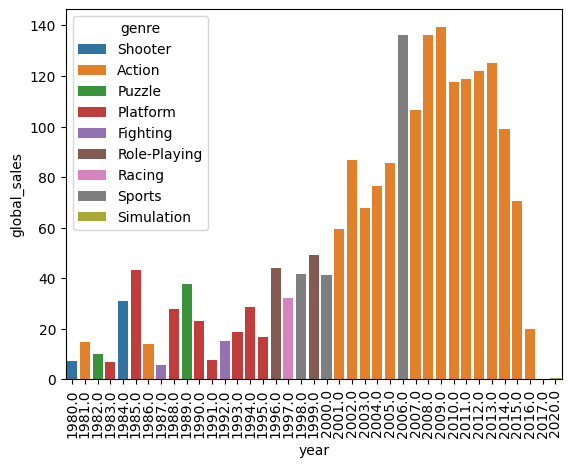

In [28]:
snsplot = sns.barplot(df_genre_most_sales, x = df_genre_most_sales['year'], 
                      y = df_genre_most_sales['global_sales'], hue = df_genre_most_sales['genre'])
snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation  = 90)

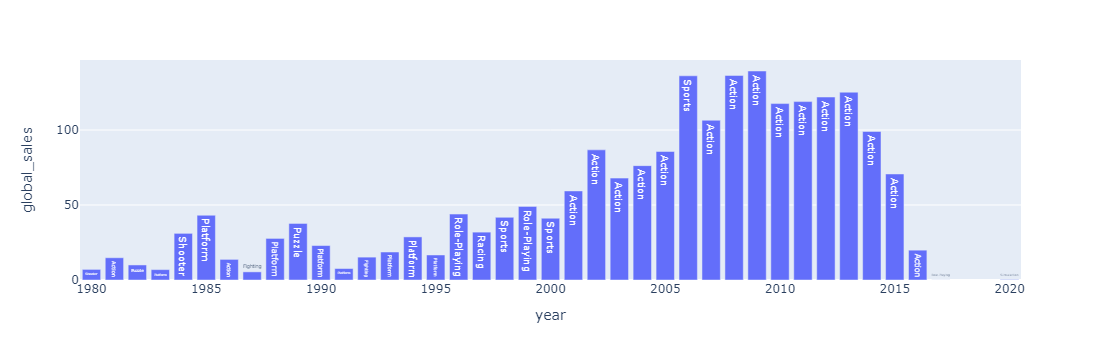

In [29]:
#То же на plotly
fig = px.bar(df_genre_most_sales, x= 'year', y = 'global_sales', text = 'genre')
fig.show()

### Похоже, что в игровой индустриии(по крайней мере у компаний приведенных в таблице) с 2014 по 2020 произошел серьезный спад по продажам

### Также построим диаграму для продаж в разных регионах по жанрам

In [30]:
# df_platform_region = df[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]\
# .groupby('platform', as_index = False).sum()

In [31]:
df_genre_region = df[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].groupby('genre', as_index = False).sum()

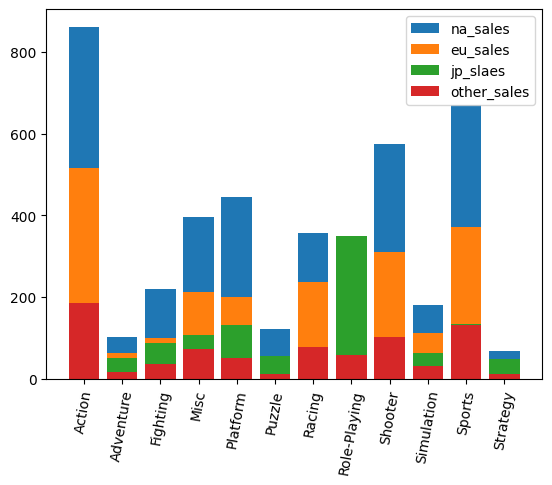

In [32]:
plt.bar( df_genre_region['genre'], df_genre_region['na_sales'], label = 'na_sales')
plt.bar( df_genre_region['genre'], df_genre_region['eu_sales'], label = 'eu_sales')
plt.bar(df_genre_region['genre'], df_genre_region['jp_sales'], label = 'jp_slaes')
plt.bar( df_genre_region['genre'], df_genre_region['other_sales'], label = 'other_sales')
plt.xticks(rotation = 80)
plt.legend()

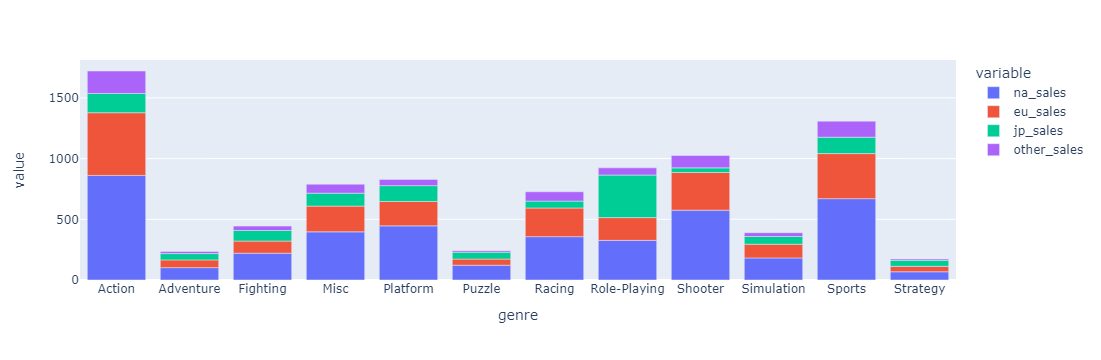

In [33]:
#То же на plotly
fig2 = px.bar(df_genre_region, x = 'genre', y = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
fig2.show()

### Можно сделать вывод, что за последние 40 лет наибольший спрос приходился на США и Канаду

# Найдем топ пять компаний по доходам 

In [34]:
a = np.array(df[['publisher', 'global_sales']]\
.groupby('publisher', as_index = False).sum().sort_values('global_sales', ascending = False).iloc[:5]['publisher'])
a

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft'], dtype=object)

In [35]:
df_top5 = df[df['publisher'].isin(a)][['publisher', 'year', 'global_sales']]\
.groupby(['year', 'publisher'], as_index  = False).sum().sort_values(['publisher', 'year'], ascending = [True, True])

### Посмотрим как изменялись доходы компаний по годам

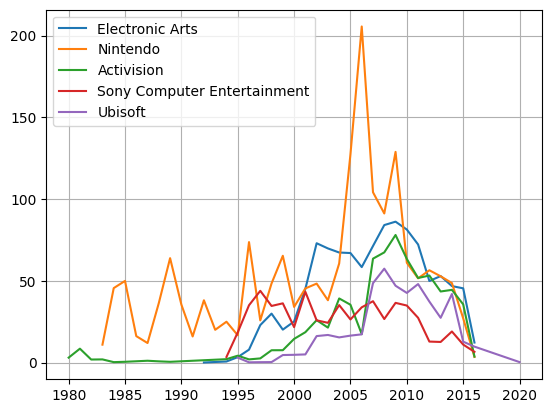

In [36]:
plt.plot(
df_top5[df_top5['publisher'] == 'Electronic Arts']['year'], df_top5[df_top5['publisher'] == 'Electronic Arts']['global_sales'],
df_top5[df_top5['publisher'] == 'Nintendo']['year'], df_top5[df_top5['publisher'] == 'Nintendo']['global_sales'],
df_top5[df_top5['publisher'] == 'Activision']['year'], df_top5[df_top5['publisher'] == 'Activision']['global_sales'],
df_top5[df_top5['publisher'] == 'Sony Computer Entertainment']['year'], df_top5[df_top5['publisher'] == 'Sony Computer Entertainment']['global_sales'],
df_top5[df_top5['publisher'] == 'Ubisoft']['year'], df_top5[df_top5['publisher'] == 'Ubisoft']['global_sales'])
plt.grid()
plt.legend(('Electronic Arts','Nintendo' , 'Activision','Sony Computer Entertainment', 'Ubisoft'))
plt.show()

### Та же картина что и на диаграме с жанрами- в 2007-2009 доходы компаний достигли пика и начали стремительно снижаться

In [37]:
pd.merge(df[df['year'] > 2009][['genre', 'global_sales']].groupby('genre', as_index = False).sum(),
df[df['year'] < 2009][['genre', 'global_sales']].groupby('genre', as_index = False).sum(), on = 'genre', how = 'inner')

,genre,global_sales_x,global_sales_y
0,Action,673.46,910.02
1,Adventure,61.03,152.88
2,Fighting,82.08,329.82
3,Misc,238.05,474.88
4,Platform,120.67,667.37
5,Puzzle,21.23,200.67
6,Racing,123.68,568.89
7,Role-Playing,305.71,570.22
8,Shooter,462.80,493.51
9,Simulation,71.15,285.12


In [38]:
pd.merge(df[df['year'] > 2009][['genre', 'name']].drop_duplicates().groupby('genre', as_index = False).count(),
df[df['year'] < 2009][['genre', 'name']].drop_duplicates()\
         .groupby('genre', as_index = False).count(), on = 'genre', how = 'inner')

,genre,name_x,name_y
0,Action,776,1006
1,Adventure,423,507
2,Fighting,114,460
3,Misc,418,744
4,Platform,90,478
5,Puzzle,101,328
6,Racing,104,614
7,Role-Playing,413,734
8,Shooter,188,568
9,Simulation,172,443


## Судя по всему причиной спада послужила потеря интереса потребителя к играм + уменьшение количества выпускаемых игр

# Посмотрим как продажи распределены по платформам и регионам

In [39]:
df_platform_region = df[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]\
.groupby('platform', as_index = False).sum()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

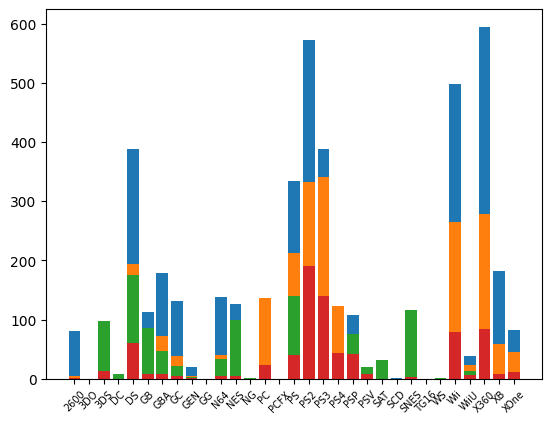

In [40]:
plt.bar(df_platform_region['platform'], df_platform_region['na_sales'], label = 'na_sales')
plt.bar(df_platform_region['platform'], df_platform_region['eu_sales'], label = 'eu_sales')
plt.bar(df_platform_region['platform'], df_platform_region['jp_sales'], label = 'jp_sales')
plt.bar(df_platform_region['platform'], df_platform_region['other_sales'], label = 'other_sales')
plt.xticks(rotation = 45, fontsize = 7)

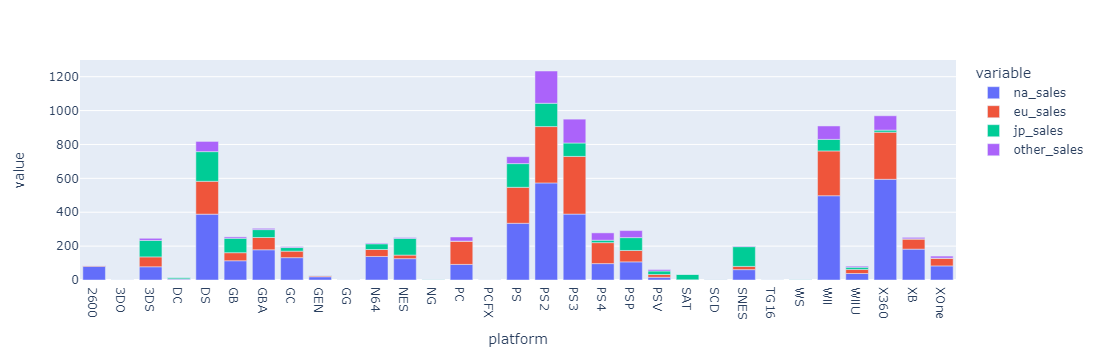

In [41]:
#То же на plotly
fig3 = px.bar(df_platform_region, x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
fig3.show()

### Судя по диаграме выгоднее всего производить игры на приставки PlayStation или Xbox и продавать их в Европе, Канаде и США

# Итак, в идеале нужно выпускать игры: жанра экшн, на платформы PlayStaytion и Xbox, расчитанные на Североамериканского и Европейского потребителя(в большей мере Североамериканского т.к. выручка больше в Северной Америке, а интересы Европейцев и Американцев сильно пересекаются) 

# Сравним две выборки(общие продажи видеоигр по Европе и Северной Америке) за 2008 год, т.к. он самый доходный для индустрии

<BarContainer object of 39 artists>

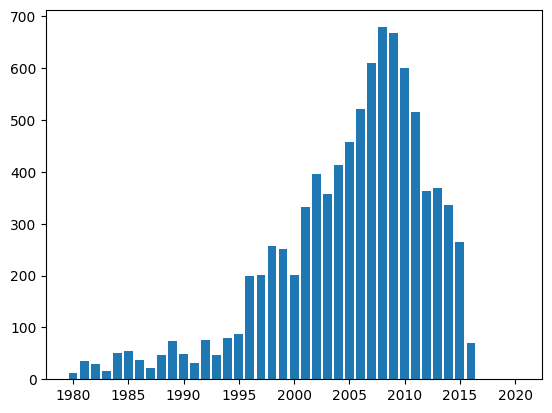

In [42]:
plt.bar(df[['year', 'global_sales']].groupby('year', as_index = False).sum()['year'], 
        df[['year', 'global_sales']].groupby('year', as_index = False).sum()['global_sales'])

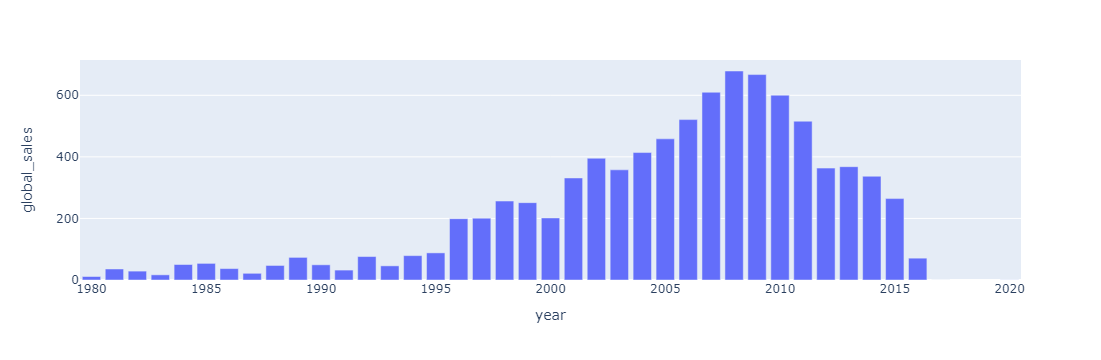

In [43]:
#То же на plotly
fig5 = px.bar(df[['year', 'global_sales']].groupby('year', as_index = False).sum(), x= 'year', y = 'global_sales')
fig5.show()

### Распределение не соответсвует нормальному, значит будем использовать бутстрап

(<Axes: >, <Axes: >)

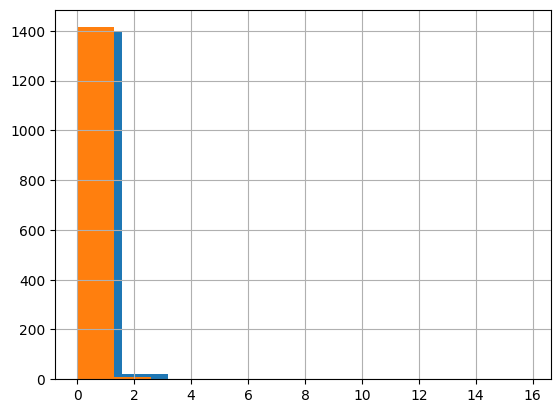

In [44]:
df.query('year == 2008')['na_sales'].hist(), df.query('year == 2008')['eu_sales'].hist()

In [45]:
#Функция для бутстрапа
def getbootstrap(arr, N):
    n = arr.size
    boot = np.random.choice(arr, size = (n,N), replace = True)
    return boot

In [46]:
import statsmodels.api as sm

In [47]:
df.query('year == 2008')['na_sales'].count(), df.query('year == 2008')['eu_sales'].count()

(1428, 1428)

In [48]:
arr1 = getbootstrap(np.array(df.query('year == 2008')['na_sales']), 50000)

In [49]:
arr2 = getbootstrap(np.array(df.query('year == 2008')['eu_sales']), 50000)

In [50]:
arr1_means = np.mean(arr1, axis = 0)
arr2_means = np.mean(arr2, axis = 0)

((array([2.5000e+01, 1.0000e+03, 8.0070e+03, 1.7645e+04, 1.5231e+04,
         6.2950e+03, 1.5460e+03, 2.2000e+02, 2.8000e+01, 3.0000e+00]),
  array([0.18322129, 0.19908473, 0.21494818, 0.23081162, 0.24667507,
         0.26253852, 0.27840196, 0.29426541, 0.31012885, 0.3259923 ,
         0.34185574]),
  <BarContainer object of 10 artists>),
 (array([1.3300e+02, 2.8280e+03, 1.1890e+04, 1.6652e+04, 1.1701e+04,
         4.9340e+03, 1.4720e+03, 3.2100e+02, 5.7000e+01, 1.2000e+01]),
  array([0.09226891, 0.10222479, 0.11218067, 0.12213655, 0.13209244,
         0.14204832, 0.1520042 , 0.16196008, 0.17191597, 0.18187185,
         0.19182773]),
  <BarContainer object of 10 artists>))

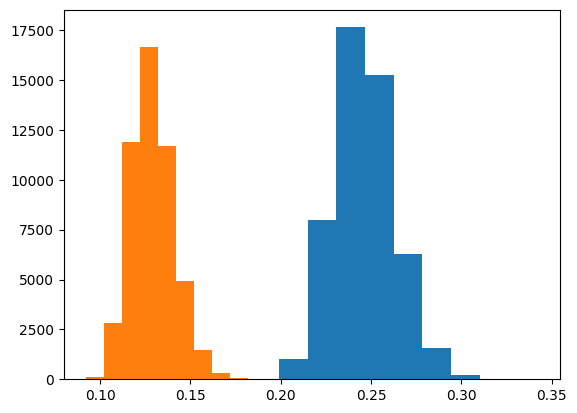

In [51]:
plt.hist(arr1_means), plt.hist(arr2_means)

In [52]:
tscore, pval, deg = sm.stats.ttest_ind(arr1_means, arr2_means)
print(tscore, '{:.12f}'.format(pval), deg)

1277.5463127647438 0.000000000000 99998.0


## Выборки значимо различаются, а значит доходы в Европе и Америке также различаются сильно